In [1]:
!nvidia-smi
!pip install gdown
!pip install tensorflow_text
!pip install wordcloud
!pip install tensorflow-gpu
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
import tensorflow_hub as hub
import tensorflow_text
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics import confusion_matrix
%matplotlib inline
!pip install --upgrade pip
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
! pip install -q scikit-plot
import scikitplot as skplt
import pickle
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

evaluation = pd.DataFrame({'Model': [],
                           'Accuracy(train)':[],
                           'Precision(train)':[],
                           'Recall(train)':[],
                           'F1_score(train)':[],
                           'Accuracy(test)':[],
                           'Precision(test)':[],
                           'Recalll(test)':[],
                           'F1_score(test)':[]})

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

%matplotlib inline
%config InlineBackend.figure_format='retina'
register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)
tf.test.is_gpu_available()

Sat Aug  7 12:29:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.119.04   Driver Version: 450.119.04   CUDA Version: 11.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

False

(11960, 4)
  ser            date                                               text  \
0   1  7/25/2020 0:52                        Dont be no $ covid19 stocks   
1   2  7/27/2020 4:24           to The for Why do not we do w The Orange   
2   3  8/30/2020 0:07    COVID19associated in two with rare kudos to for   
3   4  8/17/2020 8:13  I ' been by many whether this unique report co...   
4   5  8/17/2020 7:23  are faring better than against COVID19 This co...   

      label  
0  negative  
1   neutral  
2  negative  
3   neutral  
4  negative  
negative    6056
positive    3951
neutral     1953
Name: label, dtype: int64
(3951, 4) (6056, 4) (1953, 4)
(11960, 4)
  ser             date                                               text  \
0   6    8/4/2020 4:19            Pence of saying response to COVID19 was   
1  10   8/2/2020 18:09  said some questionable himself ; not a medical...   
2  13   8/6/2020 15:24  Clean your phone ! and share this image Get fu...   
3  15  7/30/2020 20:25

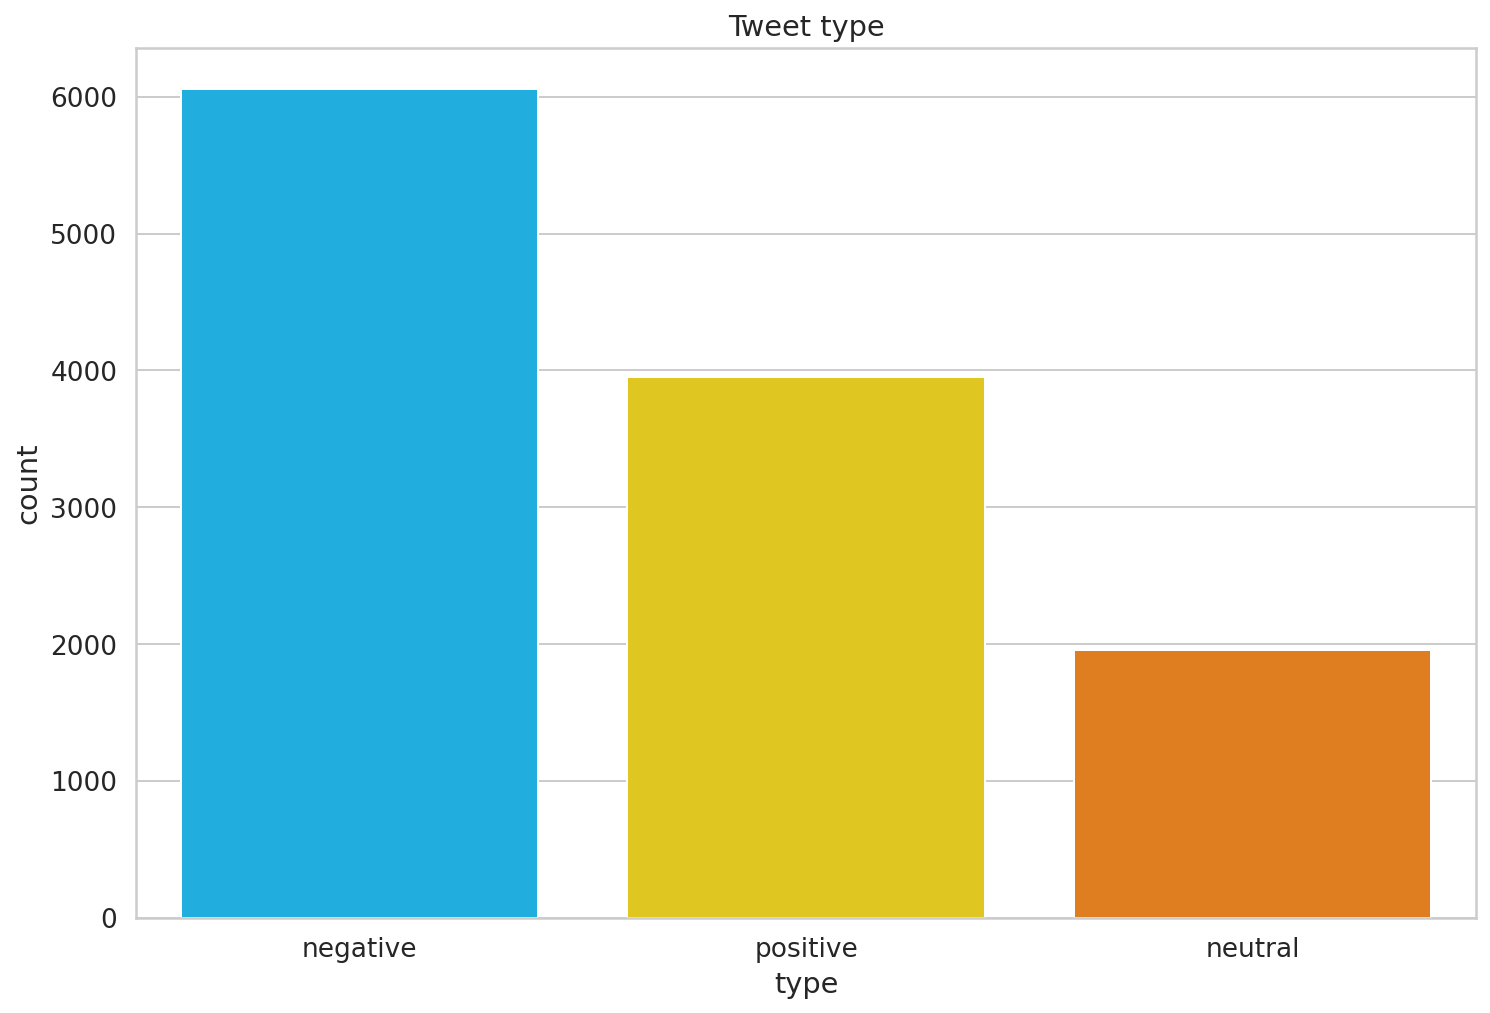

In [2]:
rcParams['figure.figsize'] = 12, 8
df = pd.read_csv('../input/covid19-labeled-tweets/COVID-19 labeled tweets.csv')
print(df.shape)
print(df.head())

print(df.label.value_counts())
sns.countplot(
  x='label',
  data=df,
  order=df.label.value_counts().index
)

plt.xlabel("type")
plt.title("Tweet type");


positive_tweets = df[df.label == "positive"]
negative_tweets = df[df.label == "negative"]
neutral_tweets = df[df.label == "neutral"]


print(positive_tweets.shape, negative_tweets.shape, neutral_tweets.shape)

pos_df = positive_tweets
neg_df = negative_tweets
neu_df = neutral_tweets
tweet_df = pos_df.append(neg_df).append(neu_df).reset_index(drop=True)
print(tweet_df.shape)
print(tweet_df.head())

In [3]:
tweet_df.head()

,ser,date,text,label
0,6,8/4/2020 4:19,Pence of saying response to COVID19 was,positive
1,10,8/2/2020 18:09,said some questionable himself ; not a medical...,positive
2,13,8/6/2020 15:24,Clean your phone ! and share this image Get fu...,positive
3,15,7/30/2020 20:25,Deport people with pending approvable green ca...,positive
4,16,8/11/2020 6:52,Why not make free from COVID19 within two whil...,positive


In [4]:
use = hub.load("https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3")
sent_1 = ["My Name is Sakib"] 
sent_2 = ["amazing location"]

emb_1 = use(sent_1)
emb_2 = use(sent_2) 
print(emb_1.shape) 
np.inner(emb_1, emb_2).flatten()[0]

(1, 512)


0.10274977

Preprocessing

In [5]:
from sklearn.preprocessing import OneHotEncoder

type_one_hot = OneHotEncoder(sparse=False).fit_transform(
  tweet_df.label.to_numpy().reshape(-1, 1)
)

print(tweet_df)
train_tweets, test_tweets, y_train, y_test =\
  train_test_split(
    tweet_df.text, 
    type_one_hot, 
    test_size=.2, 
    random_state=RANDOM_SEED
  )

X_train = []
for r in tqdm(train_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(tweet_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(tweet_emb)

X_test = np.array(X_test)
print(X_train.shape, X_test.shape)
print()
print(X_train.shape, y_train.shape)

  0%|          | 2/9568 [00:00<10:31, 15.15it/s]

         ser                      date  \
0          6             8/4/2020 4:19   
1         10            8/2/2020 18:09   
2         13            8/6/2020 15:24   
3         15           7/30/2020 20:25   
4         16            8/11/2020 6:52   
...      ...                       ...   
11955  11867  2020-03-11T18:00:00.000Z   
11956  11871  2020-03-11T18:00:00.000Z   
11957  11897  2020-03-11T18:00:00.000Z   
11958  11908  2020-03-11T18:00:00.000Z   
11959  11916  2020-03-11T18:00:00.000Z   

                                                    text     label  
0                Pence of saying response to COVID19 was  positive  
1      said some questionable himself ; not a medical...  positive  
2      Clean your phone ! and share this image Get fu...  positive  
3      Deport people with pending approvable green ca...  positive  
4      Why not make free from COVID19 within two whil...  positive  
...                                                  ...       ...  
11955       

100%|██████████| 2392/2392 [02:41<00:00, 14.77it/s]

(9568, 512) (2392, 512)

(9568, 512) (9568, 3)


In [6]:
from matplotlib import pyplot
from imblearn.over_sampling import ADASYN
from collections import Counter
oversample = ADASYN()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


# DNN

In [7]:
# METRICS = [
#       keras.metrics.TruePositives(name='tp'),
#       keras.metrics.FalsePositives(name='fp'),
#       keras.metrics.TrueNegatives(name='tn'),
#       keras.metrics.FalseNegatives(name='fn'), 
#       keras.metrics.CategoricalAccuracy(name='accuracy'),
#       keras.metrics.Precision(name='precision'),
#       keras.metrics.Recall(name='recall'),
#       keras.metrics.AUC(name='auc'),
# ]
# from imblearn.over_sampling import SMOTE

# # sm = SMOTE('not majority')
# # X_train, y_train = sm.fit_sample(X_train, y_train)
# print(X_train.shape, y_train.shape)
# gggg = pd.DataFrame(y_train)
# gggg.columns = ['negative', 'neutral','positive']

# print(f"Negative: {gggg.negative.value_counts()[1]} \nNeutral: {gggg.neutral.value_counts()[1]} \nPositive: {gggg.positive.value_counts()[1]}")
# ggggg = pd.melt(gggg)
# sns.countplot(data=ggggg.loc[ggggg['value']!=0], x='variable')

Model

In [8]:
# model = keras.Sequential()

# model.add(
#   keras.layers.Dense(
#     units=256,
#     input_shape=(X_train.shape[1], ),
#     activation='relu'
#   )
# )
# model.add(
#   keras.layers.Dropout(rate=0.5)
# )

# model.add(
#   keras.layers.Dense(
#     units=128,
#     activation='relu'
#   )
# )
# model.add(
#   keras.layers.Dropout(rate=0.5)
# )

# model.add(
#   keras.layers.Dense(
#     units=128,
#     activation='relu'
#   )
# )
# model.add(
#   keras.layers.Dropout(rate=0.5)
# )

# model.add(keras.layers.Dense(3, activation='softmax'))
# model.compile(
#     loss='categorical_crossentropy', 
#     optimizer=keras.optimizers.Adam(0.001),
#     #metrics=['accuracy']
#     metrics=METRICS
# )

# EPOCHS = 120
# BATCH_SIZE = 512

# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_auc', 
#     verbose=1,
#     patience=10,
#     mode='max',
#     restore_best_weights=True)

# history = model.fit(
#     X_train, y_train, 
#     epochs=EPOCHS, 
#     batch_size=BATCH_SIZE, 
#     validation_split=0.1, 
#     verbose=1, 
#     callbacks = [early_stopping],
#     shuffle=True
# )

# def plot_metrics(history):
#   metrics = ['loss', 'auc', 'precision', 'recall']
#   for n, metric in enumerate(metrics):
#       name = metric.replace("_"," ").capitalize()
#       plt.subplot(2,2,n+1)
#       plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
#       plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
#       plt.xlabel('Epoch')
#       plt.ylabel(name)
#       if metric == 'loss':
#         plt.ylim([0, plt.ylim()[1]])
#       elif metric == 'auc':
#         plt.ylim([0.8,1])
#       else:
#         plt.ylim([0,1])

#       plt.legend()

# plt.plot(history.history['loss'], label='train loss')
# plt.plot(history.history['val_loss'], label='val loss')
# plt.xlabel("epoch")
# plt.ylabel("Cross-entropy loss")
# plt.legend();

# plt.plot(history.history['accuracy'], label='train accuracy')
# plt.plot(history.history['val_accuracy'], label='val accuracy')
# plt.xlabel("epoch")
# plt.ylabel("accuracy")
# plt.legend();
# plot_metrics(history)

# print(model.evaluate(X_test, y_test))

# train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
# test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

# def plot_cm(labels, predictions, p=0.5):
#   cm = confusion_matrix(labels, predictions)
#   plt.figure(figsize=(5,5))
#   sns.heatmap(cm, annot=True, fmt="d")
#   plt.title('Confusion matrix @{:.2f}'.format(p))
#   plt.ylabel('Actual label')
#   plt.xlabel('Predicted label')

#   print('(True Negatives): ', cm[0][0])
#   print('(False Positives): ', cm[0][1])
#   print('(False Negatives): ', cm[1][0])
#   print('(True Positives): ', cm[1][1])
#   print('Total : ', np.sum(cm[1]))


Evaluation With Confusion Matrix


In [9]:
# baseline_results = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE, verbose=0)

# for name, value in zip(model.metrics_names, baseline_results):
#   print(name, ': ', value)
# print()

# plot_cm(y_train.argmax(axis=1), train_predictions_baseline.argmax(axis=1))
# plot_cm(y_test.argmax(axis=1), test_predictions_baseline.argmax(axis=1))

In [10]:
# baseline_results = model.evaluate(X_test, y_test,batch_size=BATCH_SIZE, verbose=0)
# for name, value in zip(model.metrics_names, baseline_results):
#   if(name=='accuracy'):
#     dnn_acc_test=value
#   elif(name=='precision'):
#     dnn_precision_test=value
#   elif(name=='recall'):
#     dnn_recall_test=value
#   print(name, ': ', value)
# dnn_f1score_test=(2*dnn_precision_test*dnn_recall_test)/(dnn_recall_test+dnn_precision_test)

# print()
# print()
# baseline_results = model.evaluate(X_train, y_train,batch_size=BATCH_SIZE, verbose=0)

# for name, value in zip(model.metrics_names, baseline_results):
#   if(name=='accuracy'):
#     dnn_acc_train=value
#   elif(name=='precision'):
#     dnn_precision_train=value
#   elif(name=='recall'):
#     dnn_recall_train=value
#   print(name, ': ', value)
# dnn_f1score_train = (2*dnn_precision_train*dnn_recall_train)/(dnn_recall_train+dnn_precision_train)

# r = evaluation.shape[0]
# evaluation.loc[r] = ['RF',dnn_acc_train,dnn_precision_train,dnn_recall_train,dnn_f1score_train,dnn_acc_test,dnn_precision_test,dnn_recall_test,dnn_f1score_test]
# evaluation

ROC Curve for Traing and Testing data

In [11]:
# import sklearn
# def plot_roc(name, labels, predictions, **kwargs):
#   fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

#   plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
#   plt.xlabel('False positives [%]')
#   plt.ylabel('True positives [%]')
#   plt.xlim([-0.5,20])
#   plt.ylim([80,100.5])
#   plt.grid(True)
#   ax = plt.gca()
#   ax.set_aspect('equal')
# import sklearn
# from scipy import interp
# from itertools import cycle
# def plot_roc(name, labels, predictions, **kwargs):
#   fpr = dict()
#   fpr = dict()
#   tpr = dict()
#   roc_auc = dict()
#   lw = 2
#   n_classes = labels.shape[1]
#   for i in range(n_classes):
#     fpr[i], tpr[i], _ = sklearn.metrics.roc_curve(labels[:, i], predictions[:, i])
#     roc_auc[i] = sklearn.metrics.auc(fpr[i], tpr[i])
#   # Compute micro-average ROC curve and ROC area
#   fpr["micro"], tpr["micro"], _ = sklearn.metrics.roc_curve(labels.ravel(), predictions.ravel())
#   roc_auc["micro"] = sklearn.metrics.auc(fpr["micro"], tpr["micro"])


#   # First aggregate all false positive rates
#   all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

#   # Then interpolate all ROC curves at this points
#   mean_tpr = np.zeros_like(all_fpr)
#   for i in range(n_classes):
#       mean_tpr += interp(all_fpr, fpr[i], tpr[i])

#   # Finally average it and compute AUC
#   mean_tpr /= n_classes

#   fpr["macro"] = all_fpr
#   tpr["macro"] = mean_tpr
#   roc_auc["macro"] = sklearn.metrics.auc(fpr["macro"], tpr["macro"])

#   # Plot all ROC curves
#   plt.figure()
#   plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

#   plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

#   colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
#   class_label = ['negative','neutral', 'positive']
#   for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(class_label[i], roc_auc[i]))

#   plt.plot([0, 1], [0, 1], 'k--', lw=lw)
#   plt.xlim([0.0, 1.0])
#   plt.ylim([0.0, 1.05])
#   plt.xlabel('False Positive Rate')
#   plt.ylabel('True Positive Rate')
#   plt.title('Some extension of Receiver Operating Characteristic to multi-class')
#   plt.legend(loc="lower right")
#   plt.show()
# plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
# plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
# # plt.legend(loc='lower right')

Testing User Input

In [12]:
# print(test_tweets.iloc[0])
# print("negative" if y_test[0][0] == 1 else ("neutral" if y_test[0][1] == 1 else "positive"))
# print(y_test[0])
# y_pred = model.predict(X_test[:1])
# print(y_pred)
# print(np.argmax(y_pred))
# "negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")
# print(test_tweets.iloc[1])
# print(y_test[1])
# print("negative" if y_test[1][0] == 1 else ("neutral" if y_test[1][1] == 1 else "positive"))

# y_pred = model.predict(X_test[1:2])
# print(y_pred)
# "negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")

# print(test_tweets.iloc[5])
# print("negative" if y_test[5][0] == 1 else ("neutral" if y_test[5][1] == 1 else "positive"))

# y_pred = model.predict(X_test[5:6])
# print(y_pred)
# "negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")

# test_str = "hello i am Mahbub"
# #y_pred = model.predict([[np.array(tf.reshape(use(test_str), [-1]).numpy())]])
# y_pred = model.predict(use(test_str))
# print(y_pred)
# "negative" if np.argmax(y_pred) == 0 else ("neutral" if np.argmax(y_pred) == 1 else "positive")

# # save model
# model.save("saved_model.h5")
# print("Saved model")

# # load model
# import tensorflow as tf 
# model = tf.keras.models.load_model('saved_model.h5')
# model.summary()

# r = evaluation.shape[0]
# evaluation.loc[r] = ['DNN',dnn_acc_train,dnn_precision_train,dnn_recall_train,dnn_f1score_train,dnn_acc_test,dnn_precision_test,dnn_recall_test,dnn_f1score_test]
# evaluation

Pre-processing for rest of the models

In [13]:
df = tweet_df
df["label"] = df["label"].astype('category')
df['label']=df['label'].cat.codes
df["label"]=df["label"].astype('float')

# Preprocessing

In [14]:
from sklearn.preprocessing import OneHotEncoder
type_one_hot = tweet_df['label']

print(tweet_df)
train_tweets, test_tweets, y_train, y_test =\
  train_test_split(
    tweet_df.text, 
    type_one_hot, 
    test_size=.1, 
    random_state=RANDOM_SEED
  )

X_train = []
for r in tqdm(train_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_train.append(tweet_emb)

X_train = np.array(X_train)

X_test = []
for r in tqdm(test_tweets):
  emb = use(r)
  tweet_emb = tf.reshape(emb, [-1]).numpy()
  X_test.append(tweet_emb)

X_test = np.array(X_test)
print(X_train.shape, X_test.shape)
print()
print(X_train.shape, y_train.shape)
oversample = ADASYN()
X_train, y_train = oversample.fit_resample(X_train, y_train)
X_test, y_test = oversample.fit_resample(X_test, y_test)

  0%|          | 2/10764 [00:00<11:05, 16.16it/s]

         ser                      date  \
0          6             8/4/2020 4:19   
1         10            8/2/2020 18:09   
2         13            8/6/2020 15:24   
3         15           7/30/2020 20:25   
4         16            8/11/2020 6:52   
...      ...                       ...   
11955  11867  2020-03-11T18:00:00.000Z   
11956  11871  2020-03-11T18:00:00.000Z   
11957  11897  2020-03-11T18:00:00.000Z   
11958  11908  2020-03-11T18:00:00.000Z   
11959  11916  2020-03-11T18:00:00.000Z   

                                                    text  label  
0                Pence of saying response to COVID19 was    2.0  
1      said some questionable himself ; not a medical...    2.0  
2      Clean your phone ! and share this image Get fu...    2.0  
3      Deport people with pending approvable green ca...    2.0  
4      Why not make free from COVID19 within two whil...    2.0  
...                                                  ...    ...  
11955                            

100%|██████████| 1196/1196 [01:21<00:00, 14.71it/s]


(10764, 512) (1196, 512)

(10764, 512) (10764,)


# Adaboost

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

base =RandomForestClassifier()
clf = AdaBoostClassifier(n_estimators=100, base_estimator=base, random_state=500)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')
r = evaluation.shape[0]
evaluation.loc[r] = ['ADABOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,ADABOOST,1.000,1.000,1.000,1.000,0.789,0.794,0.789,0.789


Confusion Matrix

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:67: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


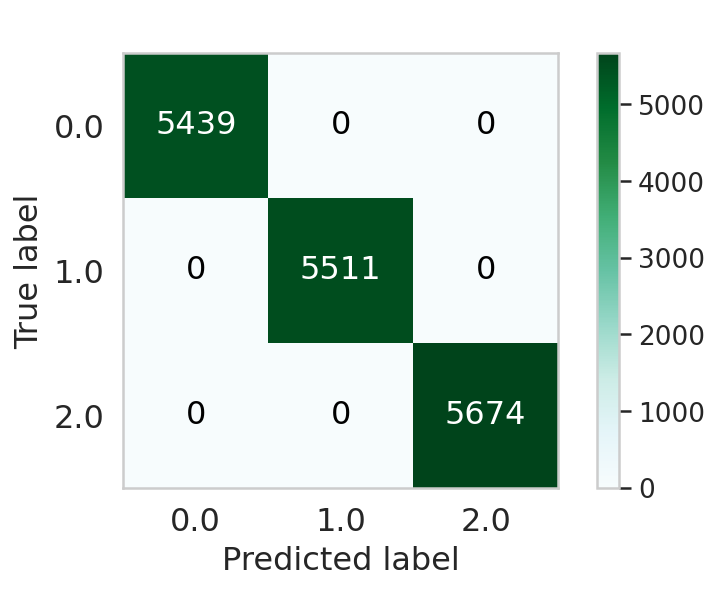

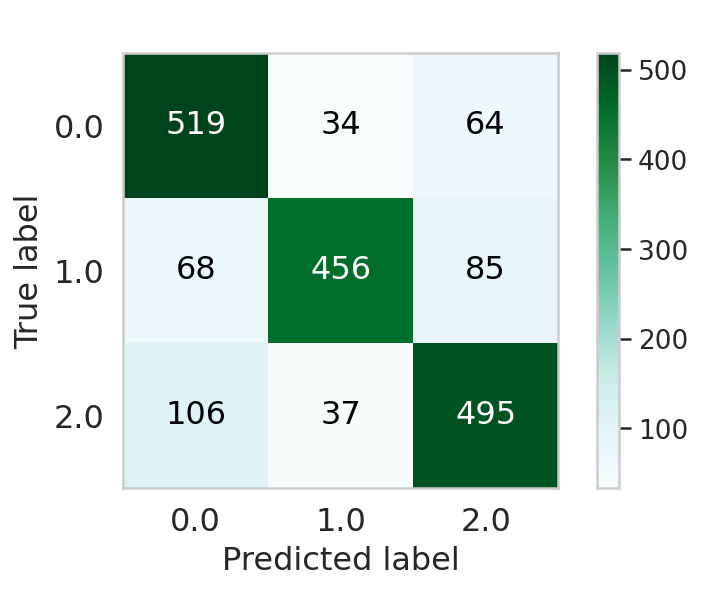

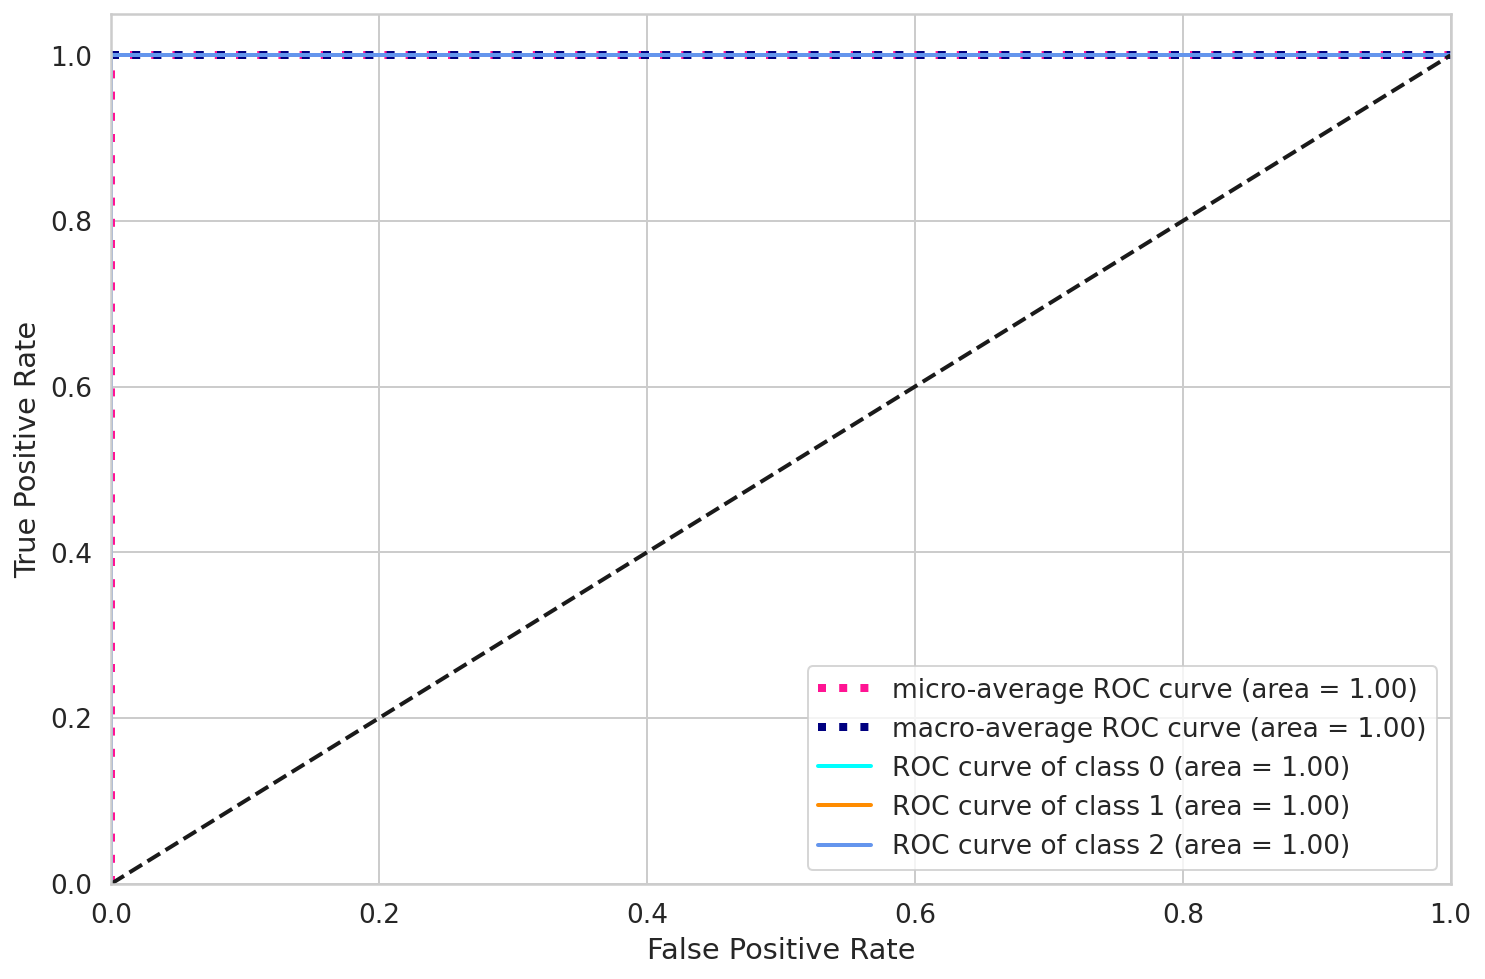

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:127: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


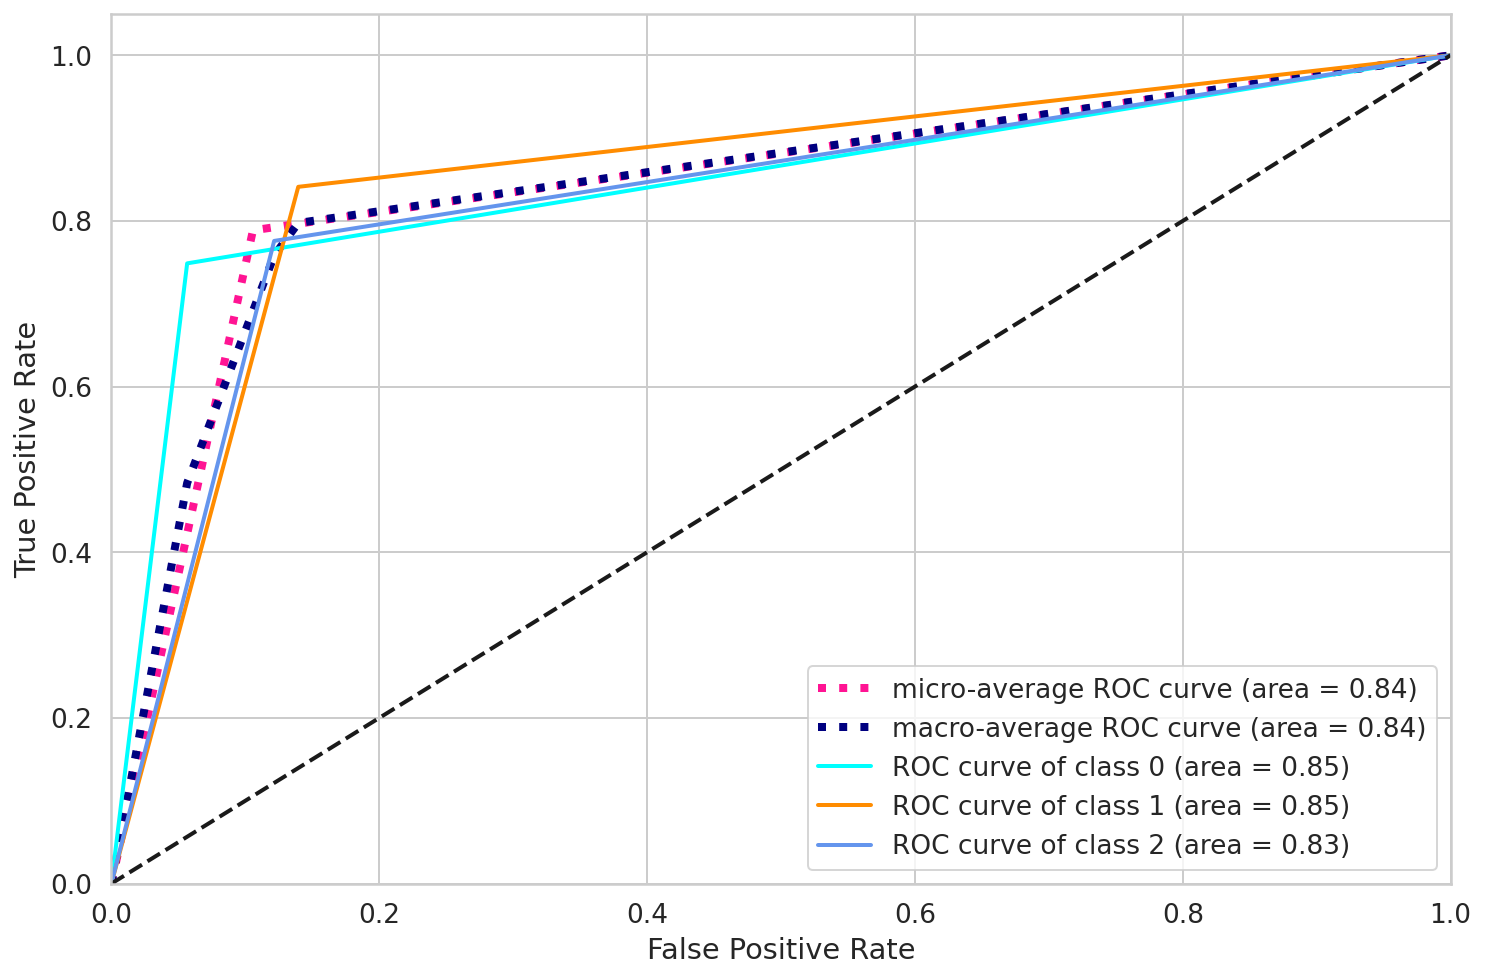

In [16]:
from scipy import interp
from itertools import cycle
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
y_score_train = pred_train
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
y_score_test = pred_test
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q


from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_train = [None] * len(y_train);    
for i in range(0, len(y_train)):    
    roc_y_train[i] = y_train[i]; 

from sklearn.preprocessing import label_binarize
y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
# y_score_test[50]=2
# roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [17]:
# from sklearn.ensemble import RandomForestClassifier
# clf =RandomForestClassifier()
# clf.fit(X_train, y_train)

# acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
# precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
# recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
# f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


# acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
# precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
# recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
# f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

# r = evaluation.shape[0]
# evaluation.loc[r] = ['RF',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
# evaluation

In [18]:
# p=y_train
# q=y_test
# # y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_train=clf.predict(X_train)
# y_score_train = pred_train
# pred_train=pd.DataFrame(pred_train)

# # pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

# pred_test=clf.predict(X_test)
# y_score_test = pred_test
# # y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_test=pd.DataFrame(pred_test)

# # pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

# skplt.metrics.plot_confusion_matrix(
#     y_train, 
#     pred_train,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )

# skplt.metrics.plot_confusion_matrix(
#     y_test, 
#     pred_test,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )
# y_train=p
# y_test=q


# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_train = [None] * len(y_train);    
# for i in range(0, len(y_train)):    
#     roc_y_train[i] = y_train[i]; 

# from sklearn.preprocessing import label_binarize
# y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
# roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_test = [None] * len(y_test);    
# for i in range(0, len(y_test)):    
#     roc_y_test[i] = y_test[i]; 
    
# # y_score_test[50]=2
# # roc_y_test[50]=2
# y_test
# from sklearn.preprocessing import label_binarize
# y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
# roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# CatBoost

In [19]:
!pip install catboost
from catboost import CatBoostClassifier

clf = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    #verbose=5,
    #loss_function='CrossEntropy'
)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['CATBOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation

0:	learn: 1.0670093	total: 808ms	remaining: 13m 26s
1:	learn: 1.0402186	total: 1.7s	remaining: 14m 8s
2:	learn: 1.0141163	total: 2.34s	remaining: 12m 56s
3:	learn: 0.9938340	total: 2.84s	remaining: 11m 48s
4:	learn: 0.9744729	total: 3.35s	remaining: 11m 6s
5:	learn: 0.9553841	total: 3.87s	remaining: 10m 41s
6:	learn: 0.9382294	total: 4.38s	remaining: 10m 20s
7:	learn: 0.9230981	total: 4.86s	remaining: 10m 2s
8:	learn: 0.9095741	total: 5.36s	remaining: 9m 49s
9:	learn: 0.8971734	total: 5.87s	remaining: 9m 41s
10:	learn: 0.8833069	total: 6.38s	remaining: 9m 33s
11:	learn: 0.8715418	total: 6.88s	remaining: 9m 26s
12:	learn: 0.8591869	total: 7.39s	remaining: 9m 21s
13:	learn: 0.8475664	total: 7.88s	remaining: 9m 15s
14:	learn: 0.8376776	total: 8.37s	remaining: 9m 9s
15:	learn: 0.8285032	total: 8.86s	remaining: 9m 5s
16:	learn: 0.8194410	total: 9.35s	remaining: 9m
17:	learn: 0.8113809	total: 10.1s	remaining: 9m 10s
18:	learn: 0.8036583	total: 10.7s	remaining: 9m 11s
19:	learn: 0.7958018	tot

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,ADABOOST,1.000,1.000,1.000,1.000,0.789,0.794,0.789,0.789
1,CATBOOST,0.999,0.999,0.999,0.999,0.858,0.859,0.858,0.858


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


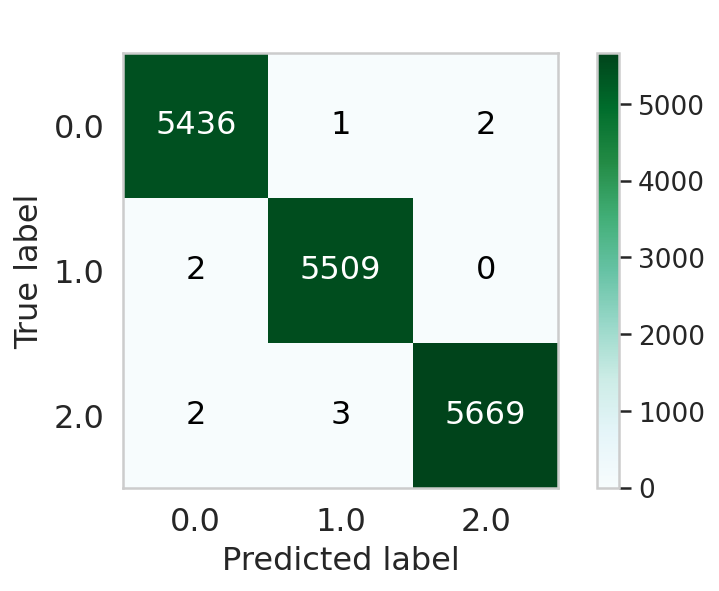

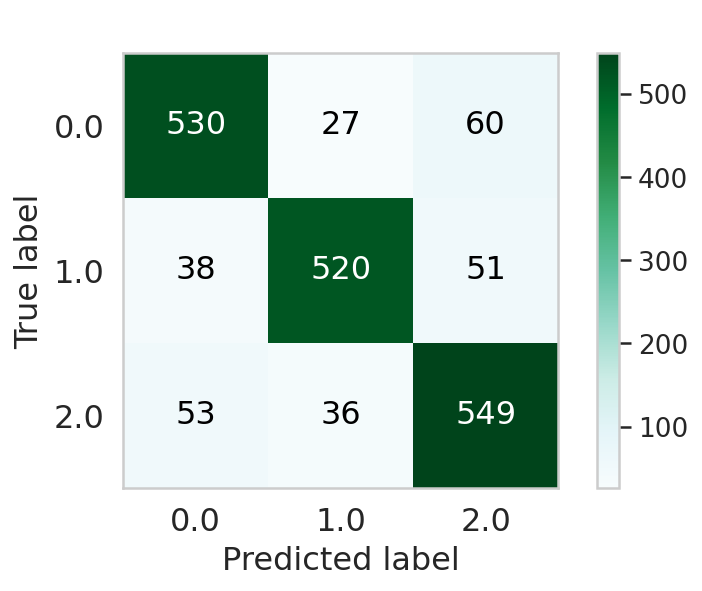

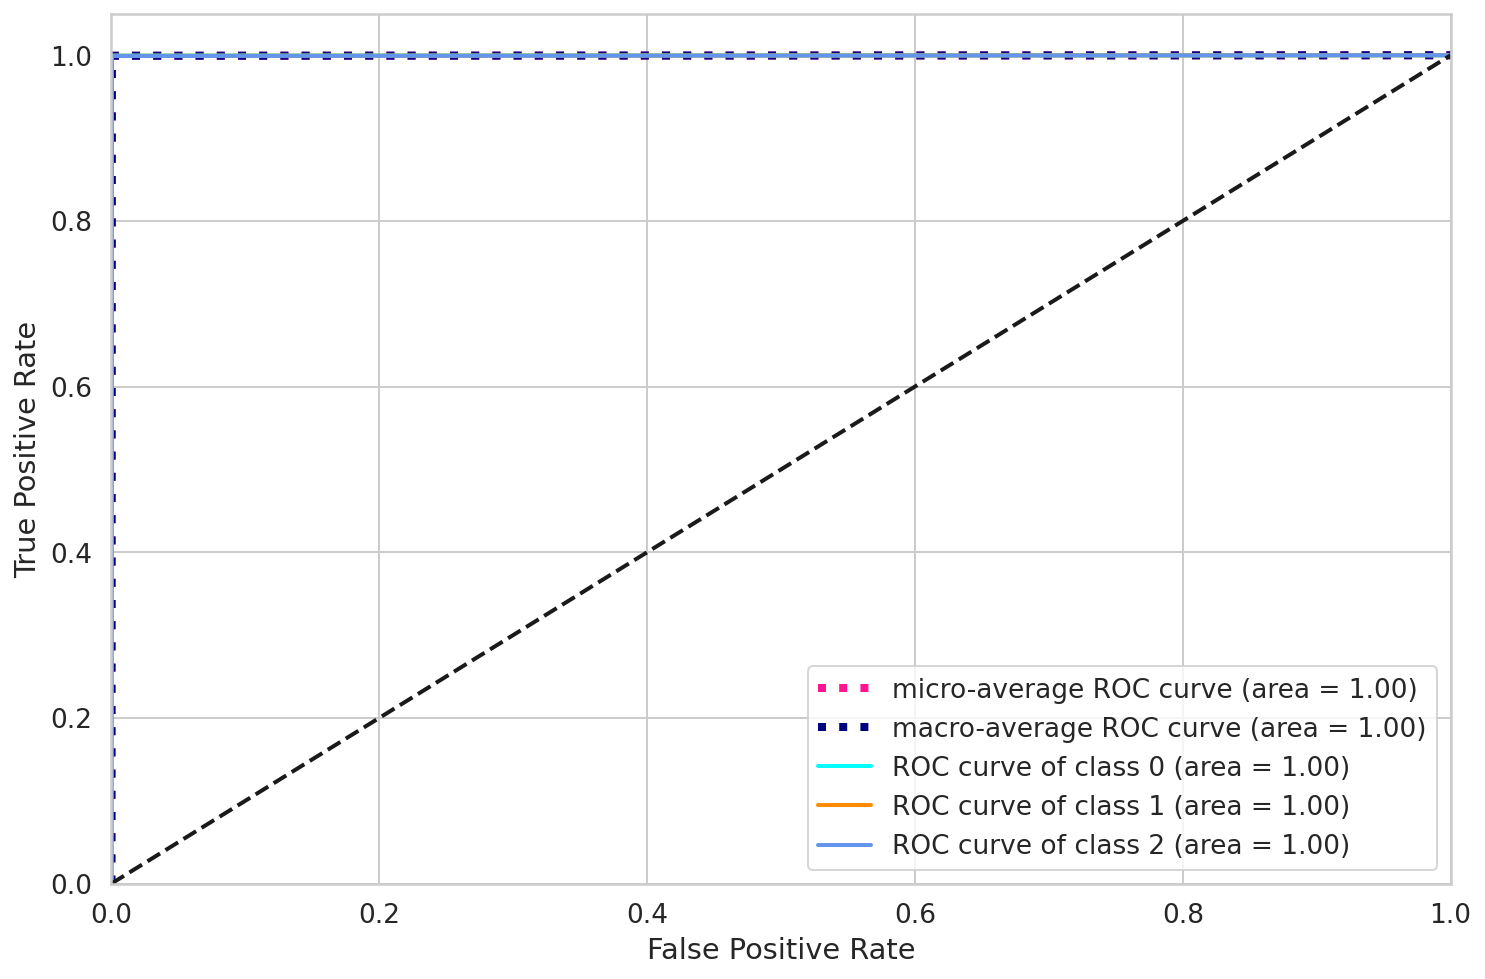

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


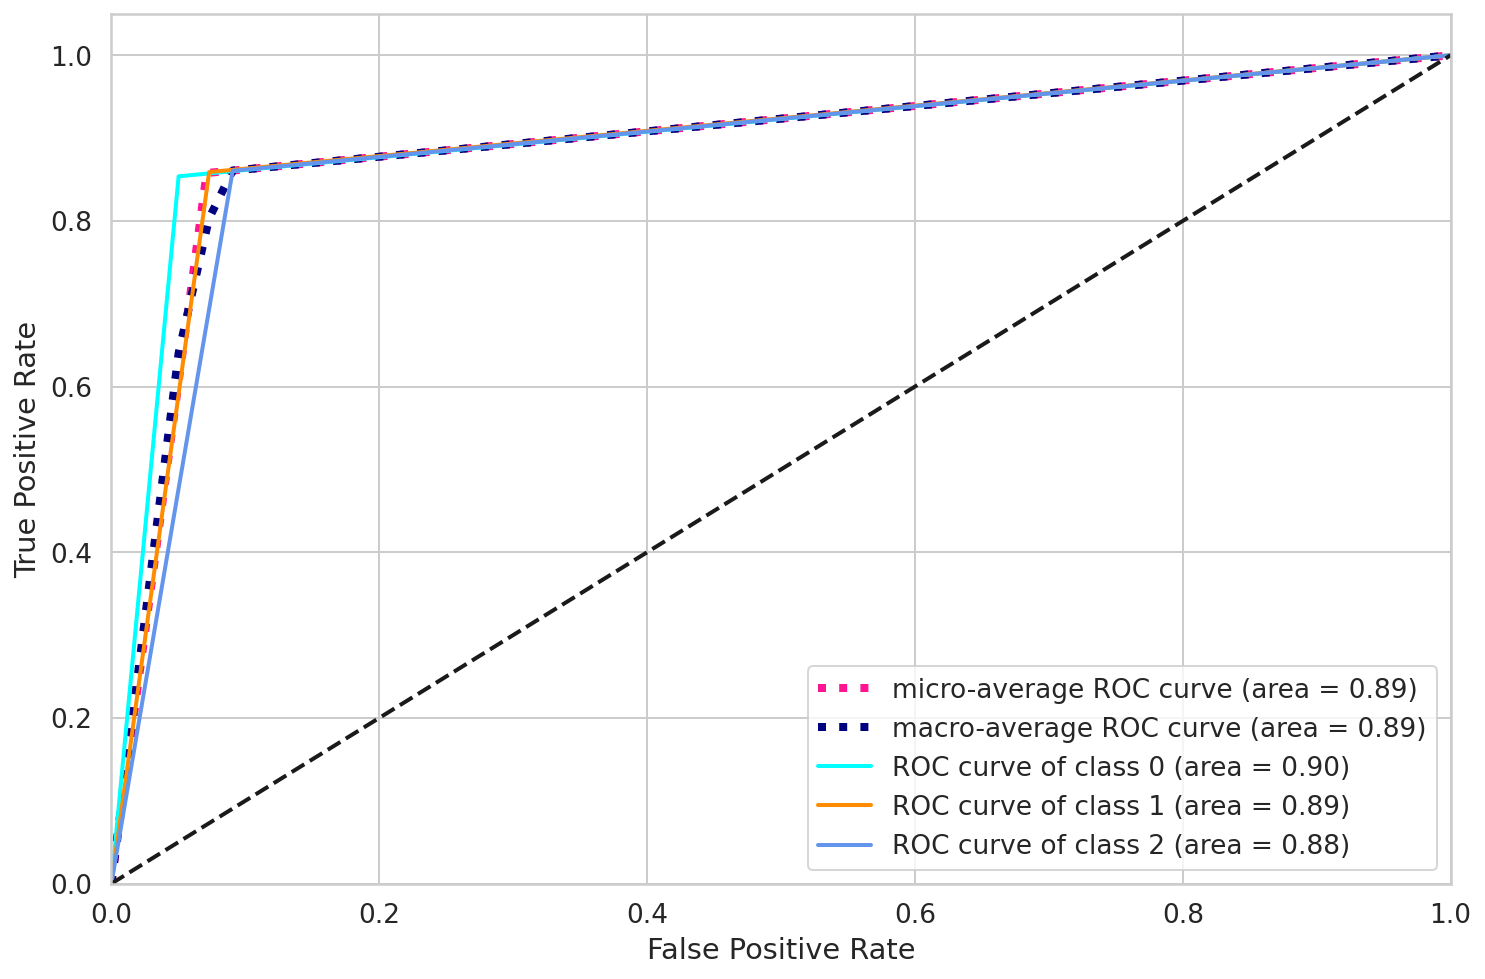

In [20]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
y_score_train = pred_train
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
y_score_test = pred_test
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q


from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_train = [None] * len(y_train);    
for i in range(0, len(y_train)):    
    roc_y_train[i] = y_train[i]; 

from sklearn.preprocessing import label_binarize
y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
# y_score_test[50]=2
# roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# XgBoost

In [21]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=700)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['XGBOOST',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:13:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,ADABOOST,1.000,1.000,1.000,1.000,0.789,0.794,0.789,0.789
1,CATBOOST,0.999,0.999,0.999,0.999,0.858,0.859,0.858,0.858
2,XGBOOST,1.000,1.000,1.000,1.000,0.831,0.834,0.831,0.831


Confusion Matrix

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


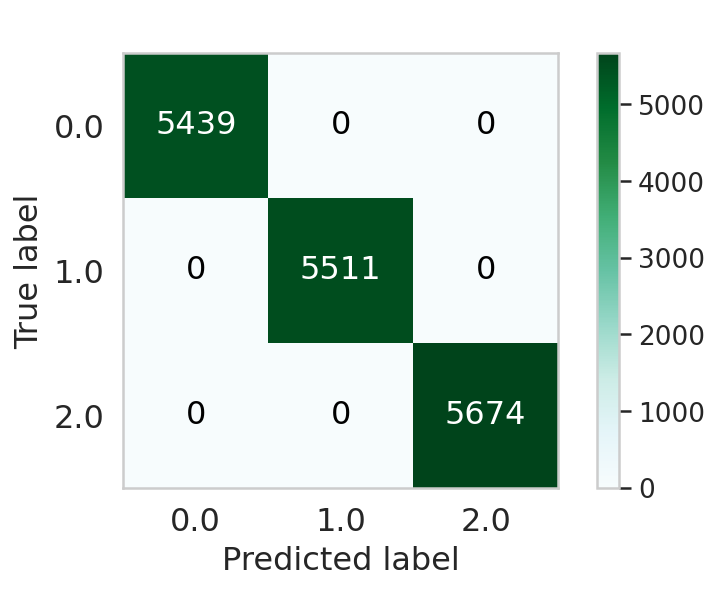

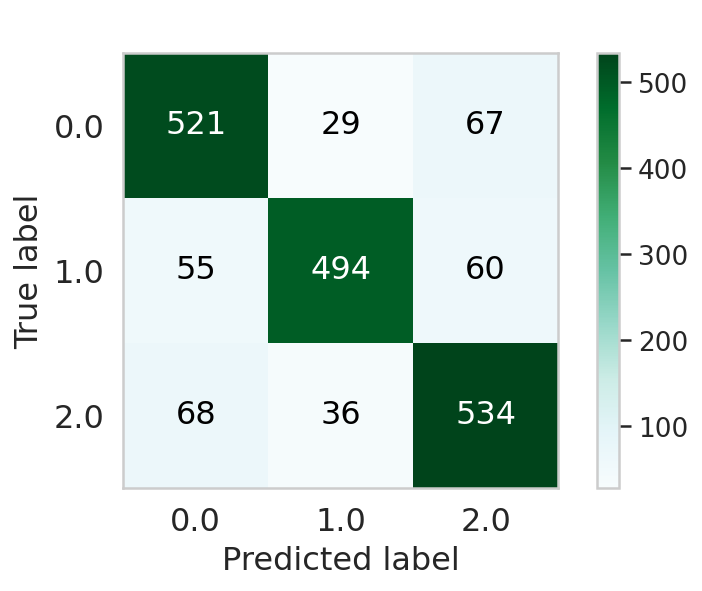

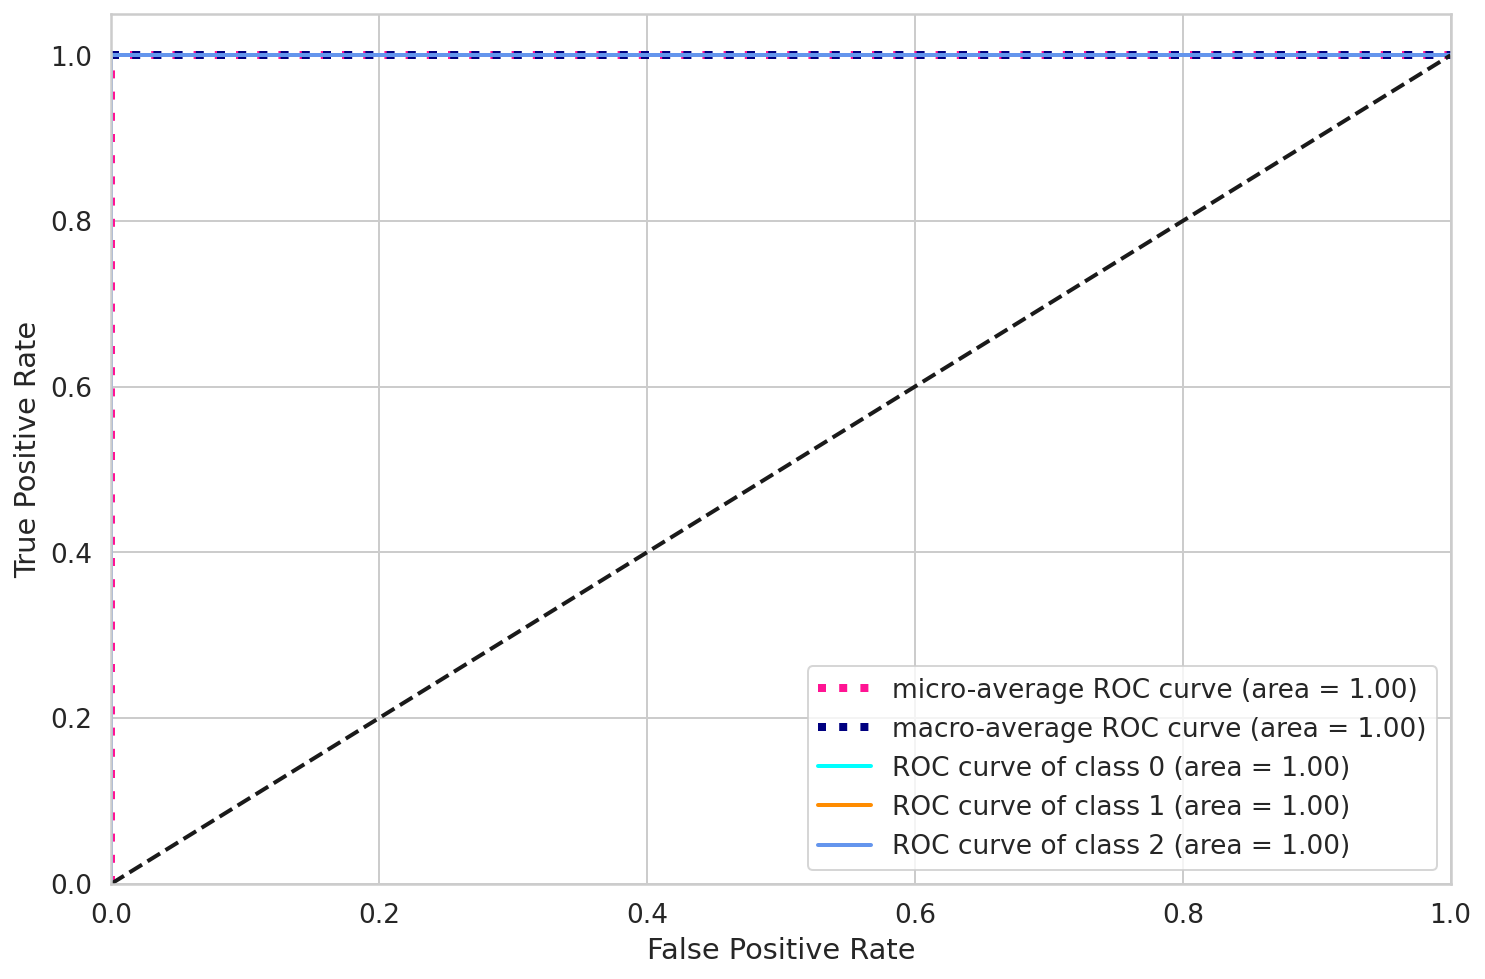

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


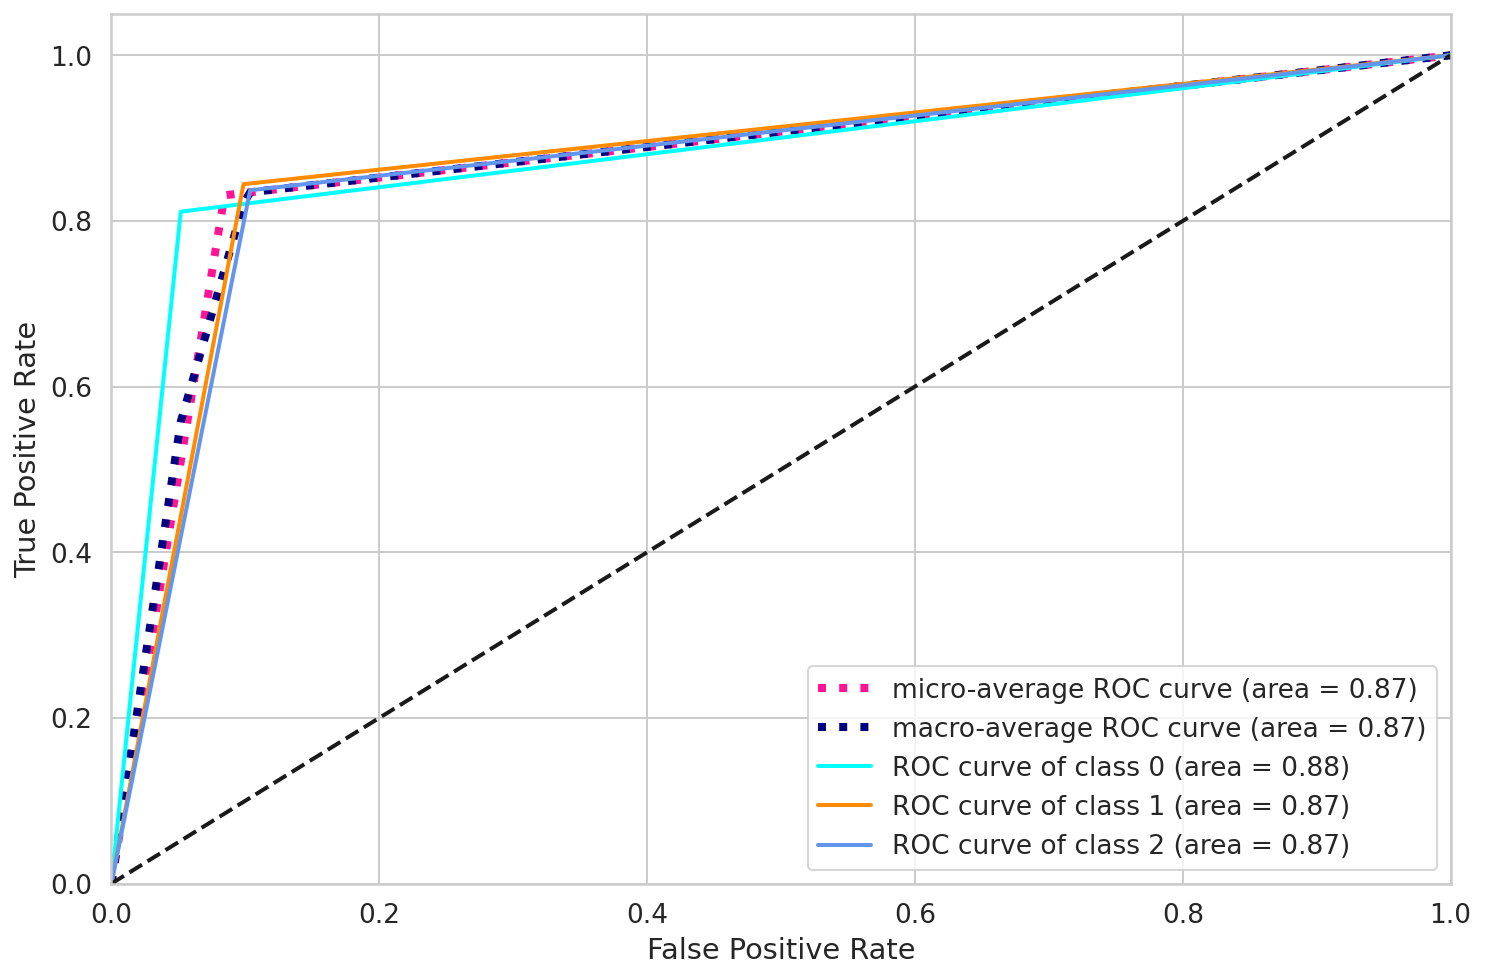

In [22]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
y_score_train = pred_train
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
y_score_test = pred_test
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q


from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_train = [None] * len(y_train);    
for i in range(0, len(y_train)):    
    roc_y_train[i] = y_train[i]; 

from sklearn.preprocessing import label_binarize
y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
# y_score_test[50]=2
# roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# SVM

In [23]:
# from sklearn import svm
# clf =svm.SVC(kernel='rbf',degree=100)
# clf.fit(X_train, y_train)

# acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
# precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
# recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
# f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


# acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
# precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
# recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
# f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

# r = evaluation.shape[0]
# evaluation.loc[r] = ['SVM',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
# evaluation

In [24]:
# MLR_y_test_prediction= model.predict(X_test)
# np.savetxt('MLR_test_prediction.csv', MLR_y_test_prediction, delimiter=',', fmt='%s')
# np.savetxt('MLR_test_actual.csv', y_test, delimiter=',', fmt='%s')

Confusion Matrix

In [25]:
# p=y_train
# q=y_test
# # y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_train=clf.predict(X_train)
# y_score_train = pred_train
# pred_train=pd.DataFrame(pred_train)

# # pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

# pred_test=clf.predict(X_test)
# y_score_test = pred_test
# # y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_test=pd.DataFrame(pred_test)

# # pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

# skplt.metrics.plot_confusion_matrix(
#     y_train, 
#     pred_train,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )

# skplt.metrics.plot_confusion_matrix(
#     y_test, 
#     pred_test,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )
# y_train=p
# y_test=q


# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_train = [None] * len(y_train);    
# for i in range(0, len(y_train)):    
#     roc_y_train[i] = y_train[i]; 

# from sklearn.preprocessing import label_binarize
# y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
# roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_test = [None] * len(y_test);    
# for i in range(0, len(y_test)):    
#     roc_y_test[i] = y_test[i]; 
    
# # y_score_test[50]=2
# # roc_y_test[50]=2
# y_test
# from sklearn.preprocessing import label_binarize
# y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
# roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# Gradient Boost

In [26]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state=1000, learning_rate=0.1,n_estimators=500)
clf.fit(X_train, y_train)

acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

r = evaluation.shape[0]
evaluation.loc[r] = ['GradientBoosting',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
evaluation

,Model,Accuracy(train),Precision(train),Recall(train),F1_score(train),Accuracy(test),Precision(test),Recalll(test),F1_score(test)
0,ADABOOST,1.000,1.000,1.000,1.000,0.789,0.794,0.789,0.789
1,CATBOOST,0.999,0.999,0.999,0.999,0.858,0.859,0.858,0.858
2,XGBOOST,1.000,1.000,1.000,1.000,0.831,0.834,0.831,0.831
3,GradientBoosting,0.998,0.998,0.998,0.998,0.842,0.844,0.842,0.843


Confusion Matrix

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:65: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


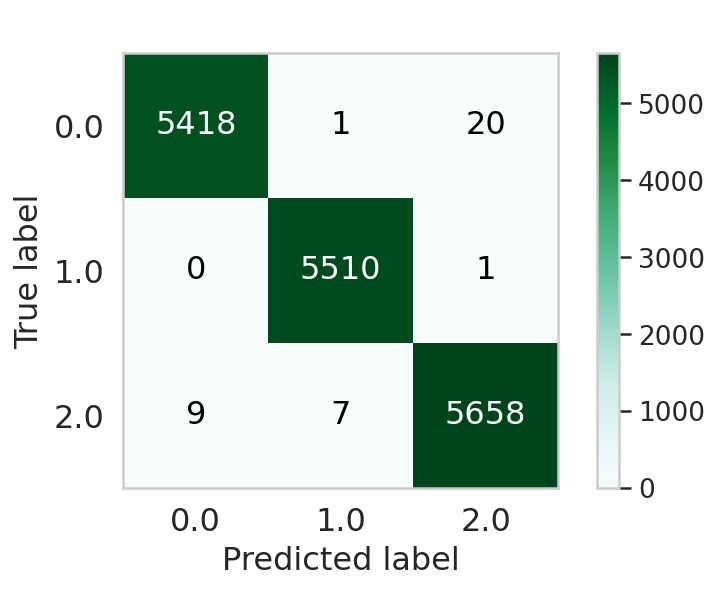

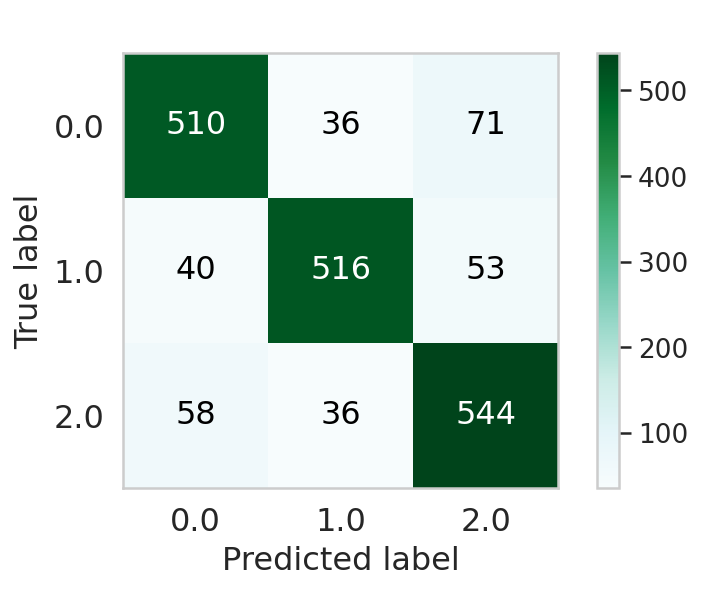

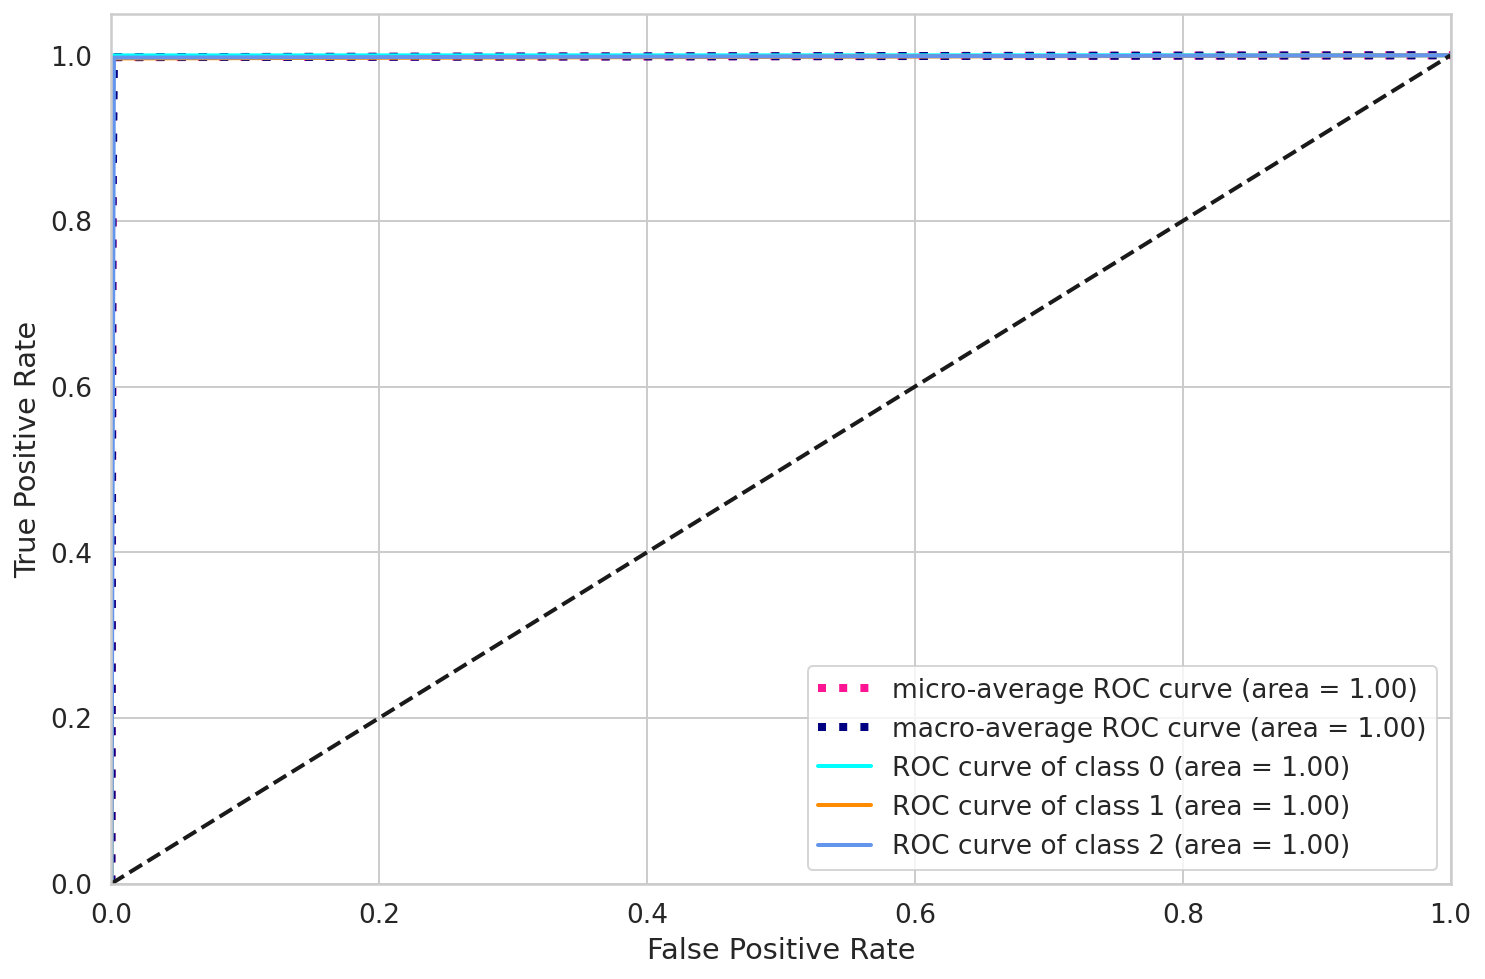

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:125: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


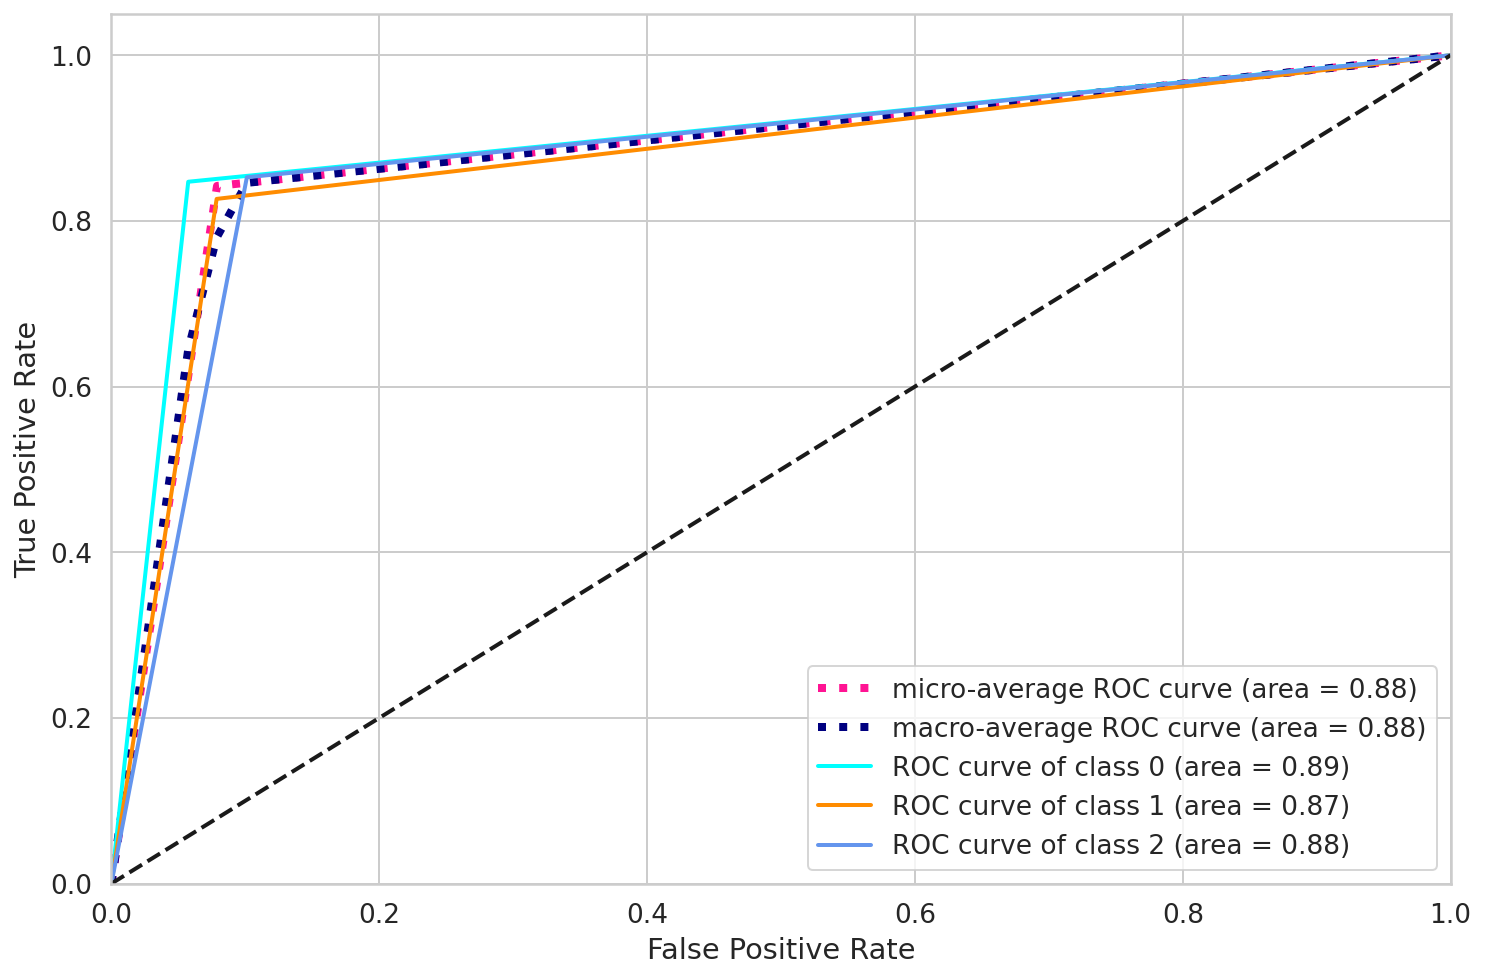

In [27]:
p=y_train
q=y_test
# y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
pred_train=clf.predict(X_train)
y_score_train = pred_train
pred_train=pd.DataFrame(pred_train)

# pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

pred_test=clf.predict(X_test)
y_score_test = pred_test
# y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
pred_test=pd.DataFrame(pred_test)

# pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

skplt.metrics.plot_confusion_matrix(
    y_train, 
    pred_train,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )

skplt.metrics.plot_confusion_matrix(
    y_test, 
    pred_test,
    figsize=(7,4),
    title_fontsize='18',
    text_fontsize='16',
    title =' ',
    cmap='BuGn'
    )
y_train=p
y_test=q


from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_train = [None] * len(y_train);    
for i in range(0, len(y_train)):    
    roc_y_train[i] = y_train[i]; 

from sklearn.preprocessing import label_binarize
y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

from sklearn.metrics import roc_curve, auc
n_classes = 3
roc_y_test = [None] * len(y_test);    
for i in range(0, len(y_test)):    
    roc_y_test[i] = y_test[i]; 
    
# y_score_test[50]=2
# roc_y_test[50]=2
y_test
from sklearn.preprocessing import label_binarize
y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# ANN


In [28]:
# from sklearn.neural_network import MLPClassifier
# clf =MLPClassifier(solver='lbfgs', alpha=1e-5,
#                      hidden_layer_sizes=(16, 16), random_state=100)
# # clf =MLPClassifier()
# clf.fit(X_train, y_train)

# acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
# precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
# recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
# f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


# acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
# precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
# recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
# f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

# r = evaluation.shape[0]
# evaluation.loc[r] = ['ANN',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
# evaluation

Confusion Matrix

In [29]:
# p=y_train
# q=y_test
# # y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_train=clf.predict(X_train)
# y_score_train = pred_train
# pred_train=pd.DataFrame(pred_train)

# # pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

# pred_test=clf.predict(X_test)
# y_score_test = pred_test
# # y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_test=pd.DataFrame(pred_test)

# # pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

# skplt.metrics.plot_confusion_matrix(
#     y_train, 
#     pred_train,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )

# skplt.metrics.plot_confusion_matrix(
#     y_test, 
#     pred_test,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )
# y_train=p
# y_test=q


# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_train = [None] * len(y_train);    
# for i in range(0, len(y_train)):    
#     roc_y_train[i] = y_train[i]; 

# from sklearn.preprocessing import label_binarize
# y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
# roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_test = [None] * len(y_test);    
# for i in range(0, len(y_test)):    
#     roc_y_test[i] = y_test[i]; 
    
# # y_score_test[50]=2
# # roc_y_test[50]=2
# y_test
# from sklearn.preprocessing import label_binarize
# y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
# roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# RadiusNeighborsClassifier

In [30]:
# from sklearn.neighbors import RadiusNeighborsClassifier
# clf = RadiusNeighborsClassifier(radius=5.0)
# clf.fit(X_train, y_train)


# acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
# precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
# recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
# f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


# acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
# precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
# recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
# f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

# r = evaluation.shape[0]
# evaluation.loc[r] = ['RadiusNeighbor Classifier',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
# evaluation

In [31]:
# p=y_train
# q=y_test
# # y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_train=clf.predict(X_train)
# y_score_train = pred_train
# pred_train=pd.DataFrame(pred_train)

# # pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

# pred_test=clf.predict(X_test)
# y_score_test = pred_test
# # y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_test=pd.DataFrame(pred_test)

# # pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

# skplt.metrics.plot_confusion_matrix(
#     y_train, 
#     pred_train,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )

# skplt.metrics.plot_confusion_matrix(
#     y_test, 
#     pred_test,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )
# y_train=p
# y_test=q


# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_train = [None] * len(y_train);    
# for i in range(0, len(y_train)):    
#     roc_y_train[i] = y_train[i]; 

# from sklearn.preprocessing import label_binarize
# y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
# roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_test = [None] * len(y_test);    
# for i in range(0, len(y_test)):    
#     roc_y_test[i] = y_test[i]; 
    
# # y_score_test[50]=2
# # roc_y_test[50]=2
# y_test
# from sklearn.preprocessing import label_binarize
# y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
# roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# Decision Tree

In [32]:
# from sklearn.datasets import load_iris
# from sklearn.model_selection import cross_val_score
# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier(random_state=0)

# clf.fit(X_train, y_train)


# acc_train=format(accuracy_score(clf.predict(X_train), y_train),'.3f')
# precision_train=format(precision_score(y_train, clf.predict(X_train), average='macro'),'.3f')
# recall_train=format(recall_score(y_train,clf.predict(X_train), average='macro'),'.3f')
# f1_train=format(f1_score(y_train,clf.predict(X_train), average='macro'),'.3f')


# acc_test=format(accuracy_score(clf.predict(X_test), y_test),'.3f')
# precision_test=format(precision_score(y_test, clf.predict(X_test), average='macro'),'.3f')
# recall_test=format(recall_score(y_test,clf.predict(X_test), average='macro'),'.3f')
# f1_test=format(f1_score(y_test,clf.predict(X_test), average='macro'),'.3f')

# r = evaluation.shape[0]
# evaluation.loc[r] = ['Decision Tree',acc_train,precision_train,recall_train,f1_train,acc_test,precision_test,recall_test,f1_test]
# evaluation

In [33]:
# p=y_train
# q=y_test
# # y_train=y_train.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_train=clf.predict(X_train)
# y_score_train = pred_train
# pred_train=pd.DataFrame(pred_train)

# # pred_train=pred_train.replace([0,1,2,3], ["B","N","SP","TO"])

# pred_test=clf.predict(X_test)
# y_score_test = pred_test
# # y_test=y_test.replace([0,1,2,3], ["B","N","SP","TO"])
# pred_test=pd.DataFrame(pred_test)

# # pred_test=pred_test.replace([0,1,2,3], ["B","N","SP","TO"])

# skplt.metrics.plot_confusion_matrix(
#     y_train, 
#     pred_train,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )

# skplt.metrics.plot_confusion_matrix(
#     y_test, 
#     pred_test,
#     figsize=(7,4),
#     title_fontsize='18',
#     text_fontsize='16',
#     title =' ',
#     cmap='BuGn'
#     )
# y_train=p
# y_test=q


# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_train = [None] * len(y_train);    
# for i in range(0, len(y_train)):    
#     roc_y_train[i] = y_train[i]; 

# from sklearn.preprocessing import label_binarize
# y_score_train = label_binarize(y_score_train, classes=[1, 0, 2])
# roc_y_train = label_binarize(roc_y_train, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_train[:, i], y_score_train[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_train.ravel(), y_score_train.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()

# from sklearn.metrics import roc_curve, auc
# n_classes = 3
# roc_y_test = [None] * len(y_test);    
# for i in range(0, len(y_test)):    
#     roc_y_test[i] = y_test[i]; 
    
# # y_score_test[50]=2
# # roc_y_test[50]=2
# y_test
# from sklearn.preprocessing import label_binarize
# y_score_test = label_binarize(y_score_test, classes=[1, 0, 2])
# roc_y_test = label_binarize(roc_y_test, classes=[1, 0, 2])

# fpr = dict()
# tpr = dict()
# roc_auc = dict()
# for i in range(n_classes):
#     fpr[i], tpr[i], _ = roc_curve(roc_y_test[:, i], y_score_test[:, i])
#     roc_auc[i] = auc(fpr[i], tpr[i])
# # Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(roc_y_test.ravel(), y_score_test.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# lw = 2
# all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# mean_tpr = np.zeros_like(all_fpr)
# for i in range(n_classes):
#     mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# mean_tpr /= n_classes
# fpr["macro"] = all_fpr
# tpr["macro"] = mean_tpr
# roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# plt.figure()
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

# plt.plot(fpr["macro"], tpr["macro"],
#          label='macro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc["macro"]),
#          color='navy', linestyle=':', linewidth=4)

# colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
# for i, color in zip(range(n_classes), colors):
#     plt.plot(fpr[i], tpr[i], color=color, lw=lw,
#              label='ROC curve of class {0} (area = {1:0.2f})'
#              ''.format(i, roc_auc[i]))

# plt.plot([0, 1], [0, 1], 'k--', lw=lw)
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.legend(loc="lower right")
# plt.show()